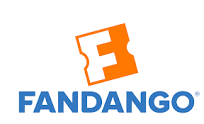

## Project: Investigating Fandango Movie Ratings

### Is Fandango Still Inflating Ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Walt Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating.  
He was able to find that:

The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, I'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


### Exploring the Data:

Walt Hickey made the data he analyzed publicly available on GitHub. We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

Link to Walt Hickey's data:
[Github](https://github.com/fivethirtyeight/data/tree/master/fandango)

Dataquest has collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on GitHub and I'll use it to analyze the rating system's characteristics after Hickey's analysis.

Link to Dataquest's data: [Github](https://github.com/mircealex/Movie_ratings_2016_17)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

fandango_2015 = pd.read_csv('fandango_score_comparison.csv')
fandango_16_17 = pd.read_csv('movie_ratings_16_17.csv')

This is the 2015 Fandago data set read me explaining the data structure. 

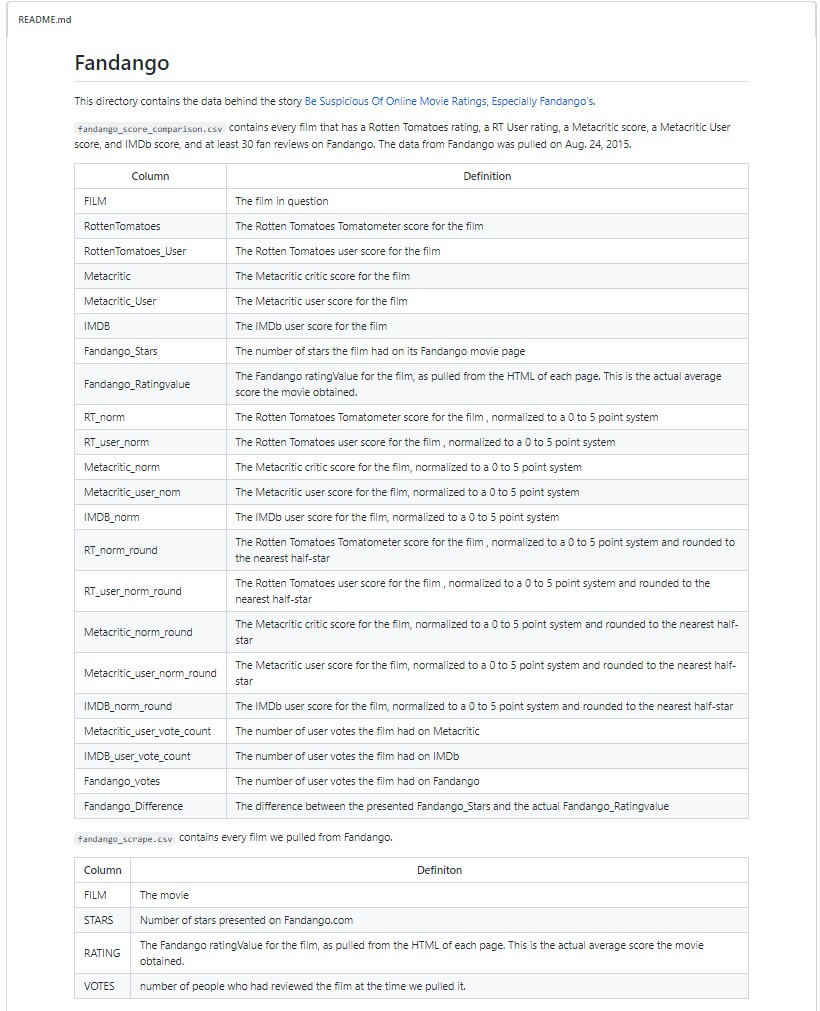

This is the 2016-2017 Fandago Dataset structure 

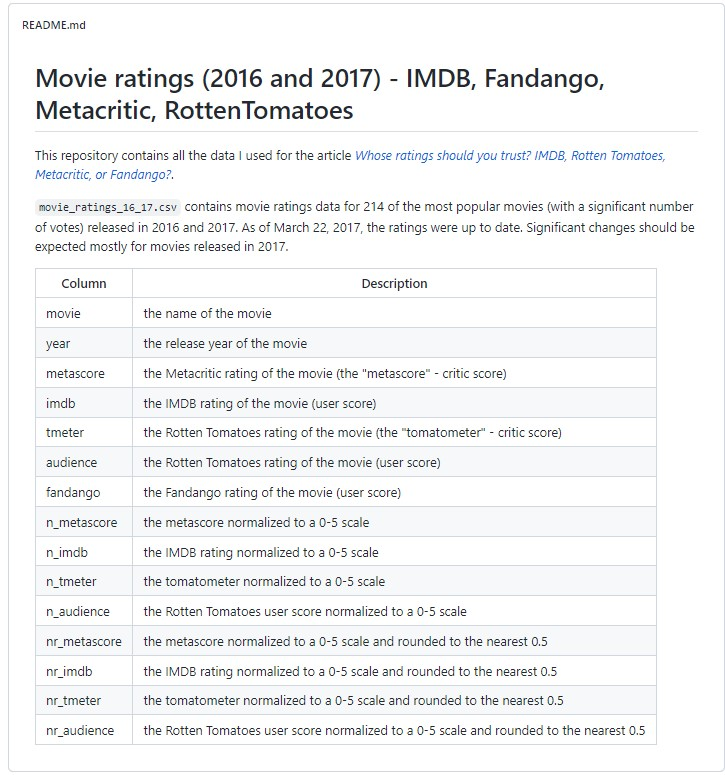

Looking at the dataset structures I will isolate the relevant columns needed for future analysis in a seperate dataframe. 

In [2]:
f_2015 = fandango_2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
f_1617 = fandango_16_17[['movie', 'year', 'fandango']].copy()

print(f_2015.head())
print(f_1617.head())


                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  
                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


In [3]:
f_2015.info()
f_1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


My goal is to determine if their has been a change with the movie rating system Fandago uses. Have they really adjusted their movie ratings to reflect accurately or are they still rounding the movie ranking upwards. Before I can answer this question we have a few concerns about the datasets. 

The 2015 Fandago Dataset has __146 rows__ while the 2016-2017 dataset has __214 rows__. 

According to the README.md file of Hickey's repository the following sampling criteria was used:

* The movie had at least 30 fan reviews on Fandango's website 
* Movie was released before Aug. 24, 2015 
* The movie must have had tickets on sale in 2015


According to the README.md file of the Dataquest repository the following sampling criteria was used:

* The movie must have had a significant number of votes and reviews.
* The movie must have been released in 2016 and 2017.
* The movie must have had reviews on Fandango as of March 22, 2017.

These samples were not selected in random. Not every movie had an chance to be included in a sample because each dataset was collected based on certain parameters. I can conclude that these two datasets are not a ideal representation of the entire population.

### Changing the Goal of our Analysis

Instead of abandoning the project I will have to adjust the goal of the project. We will change the goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

###  Isolating the Samples for 2015 and 2016 movie releases. 

In [4]:
f_2015['FILM']

0                 Avengers: Age of Ultron (2015)
1                              Cinderella (2015)
2                                 Ant-Man (2015)
3                         Do You Believe? (2015)
4                  Hot Tub Time Machine 2 (2015)
                         ...                    
141                            Mr. Holmes (2015)
142                                   '71 (2015)
143                   Two Days, One Night (2014)
144    Gett: The Trial of Viviane Amsalem (2015)
145           Kumiko, The Treasure Hunter (2015)
Name: FILM, Length: 146, dtype: object

In [5]:
f_1617['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

As can be seen above there is some movies from 2014 in the 2015 dataset. The year is entered in the Film name column. 
To filter this properly with only movies in 2015 I will need to extract the year into a new column and remove any movie not from 2015. 

In the second dataset I will need to drop the 2017 year. 

In [6]:
f_2015['year'] = f_2015['FILM'].str[-5:-1]

f_2015['year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object

In [7]:
only_2015 = f_2015[f_2015['year'] == '2015']
print(only_2015.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  129 non-null    object 
 1   Fandango_Stars        129 non-null    float64
 2   Fandango_Ratingvalue  129 non-null    float64
 3   Fandango_votes        129 non-null    int64  
 4   Fandango_Difference   129 non-null    float64
 5   year                  129 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.1+ KB
None


In [8]:
only_2016 = f_1617[f_1617['year'] == 2016]

print(only_2016.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     191 non-null    object 
 1   year      191 non-null    int64  
 2   fandango  191 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB
None


Since the movies in the first dataset for 2015 filtered movies with atleast 30 ratings. This will provide a challenge for the 2016 dataset. A solution around this is to confirm with the fandago website of the ratings. I will take a sample of 2016 and find its ratings.

In [9]:
only_2016.sample(10, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


Reviewing the first movie I can see a problem with my sample. The first movie Collide was actually released in 2017. I will drop this movie out of the dataframe and resample. Its alot of movies to comb through to identify if they were truly released in 2016 so hopefully there are just a few outliers. 

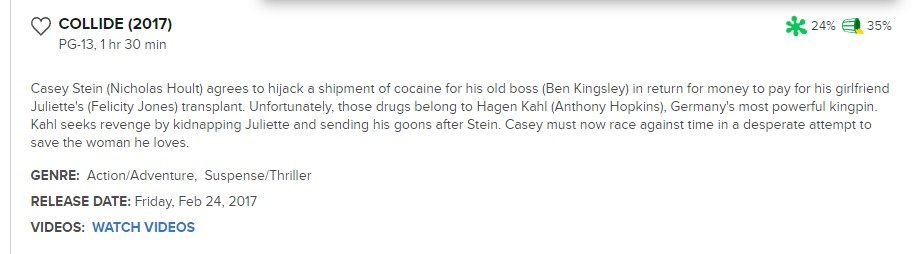

In [10]:
only_2016 = only_2016.drop(36)

In [11]:
only_2016.sample(10,random_state=1)

,movie,year,fandango
37,Come and Find Me,2016,4.0
76,Imperium,2016,4.5
125,Now You See Me 2,2016,4.0
133,Precious Cargo,2016,3.0
93,Kung Fu Panda 3,2016,4.5
171,The Disappointments Room,2016,2.5
41,Deepwater Horizon,2016,4.5
115,Money Monster,2016,4.0
112,Misconduct,2016,3.0
111,Miracles from Heaven,2016,4.5


After running this sample. I noticed that fandago no longer offers their own reviews. They now partner with rotten tomatoes. 
Going based off the rotten tomatoes review. 

movie  | reviews
------ |-------
Come and Fine Me | 14
Imperium | 76
Now You See Me 2 | 200
Precious Cargo | 22
Kung Fu Panda 3 | 180
The Disappointments Room | 27
Deepwater Horizon | 268
Money Monster | 286
Misconduct | 29
Miracles from Heaven | 93


We have 6/10 movies with a review over 30. 3 of the movies are in the 22-29 review range. Which is not that far off. 
I would say its okay to proceed with this dataset on 2016 movies. 





### Comparing Distribution Shapes for 2015 and 2016

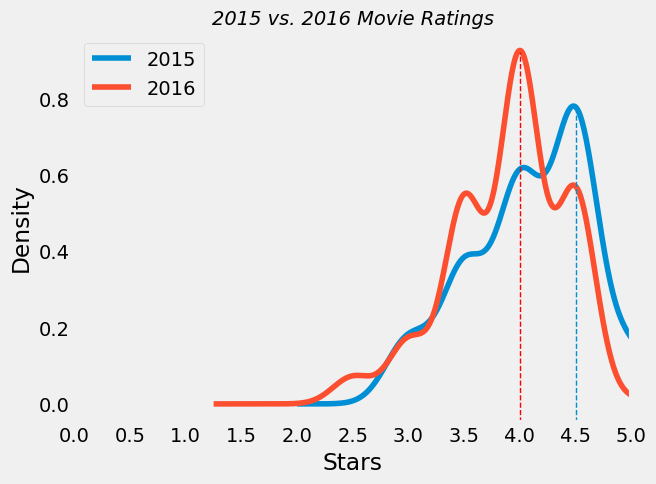

In [12]:
plt.style.use('fivethirtyeight')
only_2015['Fandango_Stars'].plot.kde(label='2015')
only_2016['fandango'].plot.kde(label='2016')
plt.xlim(0,5)
plt.xlabel('Stars')
plt.xticks(np.arange(0,5.1,.5))
plt.legend()
plt.grid(False)
plt.title('2015 vs. 2016 Movie Ratings', fontsize=14, fontstyle='oblique')
plt.axvline(x=4.5, linewidth=1, ymax=0.8, linestyle='dashed')
plt.axvline(x=4.0, linewidth=1, ymax=0.95, linestyle='dashed', color='red')
plt.show()

As we can see with the distribution of the ratings the overall ratings for 2016 decreased. The highest density point for 2016 was __4 Stars__ while 2015 was __4.5 Stars__. Both 2015 and 2016 are still heavily left skewed. 

This could be a result of course correction on Fandago but what is curious to me is the amount of density between 3.5-4.5. The movie ratings below and above this range is a heavy sloped drop. Lets see what a scatter plot would look like on 2016.

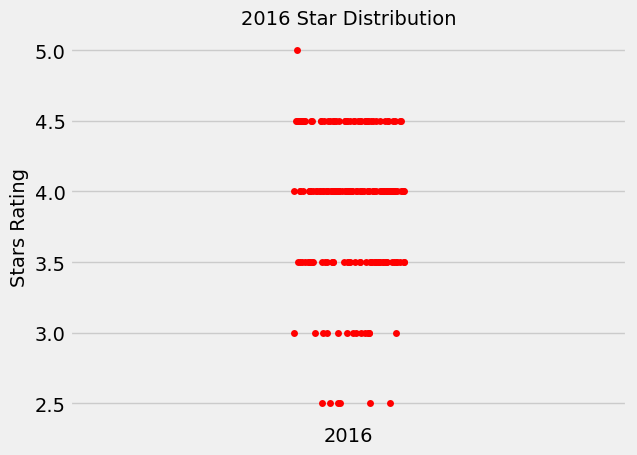

In [13]:
sns.stripplot(x='year',y='fandango', data=only_2016, jitter=True, color='red')
plt.ylabel('Stars Rating', fontsize=14)
plt.xlabel('')
plt.title('2016 Star Distribution', fontsize=14)
plt.show()

As we can see how the strip plot confirms that 4 and 4.5 stars are actually more densly packed then above. Fandango could still be skewing their ratings just not as heavily as before. Further analysis would be needed to confirm this. 

### Lets Examine the frequency distribution between 2015 and 2016 

In [14]:
freq_2015 = round(only_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() *100,2)
freq_2016 = round(only_2016['fandango'].value_counts(normalize=True).sort_index() *100,2)

print(freq_2015)
print(freq_2016)

freq_grouped = pd.concat([freq_2016, freq_2015],axis=1).fillna(0)

3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64
2.5     3.16
3.0     7.37
3.5    23.68
4.0    40.53
4.5    24.74
5.0     0.53
Name: fandango, dtype: float64


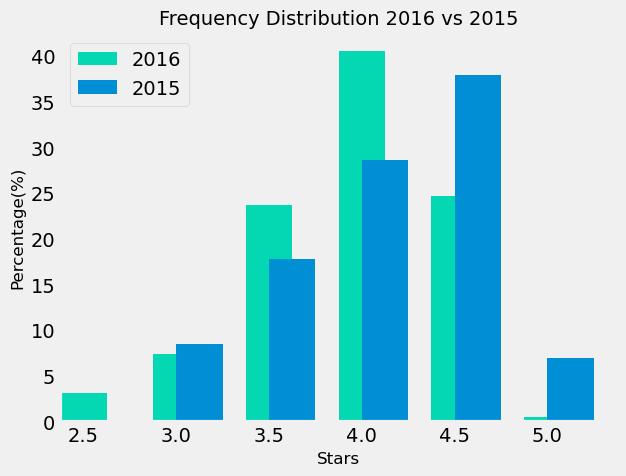

In [15]:
freq_grouped['fandango'].plot.bar(color='#04D8B2', align='center', label=2016)
freq_grouped['Fandango_Stars'].plot.bar(align='edge', label=2015)
plt.xticks(rotation=0)
plt.grid(False)
plt.title('Frequency Distribution 2016 vs 2015', fontsize=14)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Percentage(%)', fontsize=12)
plt.legend()
plt.show()

As we can see the bar graph just visualizes the data better. We can see that 2016 ratings shifted to the left. There is now a heavy distribution between 3.5-4.5 as I visually noticed before. Lets see the direction of the change.

### Determining the Direction of the Change

I will use the mean, median, and mode to compare 2015 to 2016 and then plot them on a bar graph. 

In [16]:
mean_2015 = round(only_2015['Fandango_Stars'].mean(),1)
median_2015= round(only_2015['Fandango_Stars'].median(),1)
mode_2015 = round(only_2015['Fandango_Stars'].mode(),1)[0]

mean_2016= round(only_2016['fandango'].mean(),1)
median_2016= round(only_2016['fandango'].median(),1)
mode_2016= round(only_2016['fandango'].mode(),1)[0]

m_3 = pd.DataFrame(({'mean':[mean_2015,mean_2016],
                         'median':[median_2015,mean_2016],
                         'mode':[mode_2015,mode_2016]}),index=['2015','2016'])

m_3 = m_3.T

print(m_3)

        2015  2016
mean     4.1   3.9
median   4.0   3.9
mode     4.5   4.0


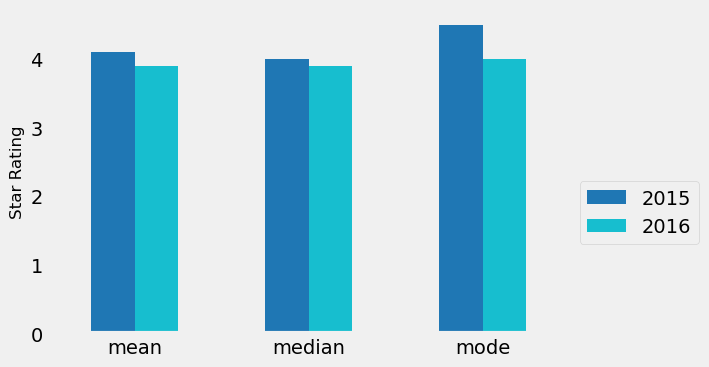

In [17]:
m_3.plot.bar(figsize=(6,4), colormap='tab10')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)
plt.grid(False)
plt.ylabel('Star Rating', fontsize=12)
plt.show()

As we can see again 2016 is lower across across each distribution. An interesting observation is how all 3 distributions for 2016 are almost exactly a 4 star rating. 

### Comparing other movie rating sites against 2016 Fandango. 

I will compare the Fandago 2016 ratings to the other website ratings from 2015.

In [18]:
fandango_2015.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

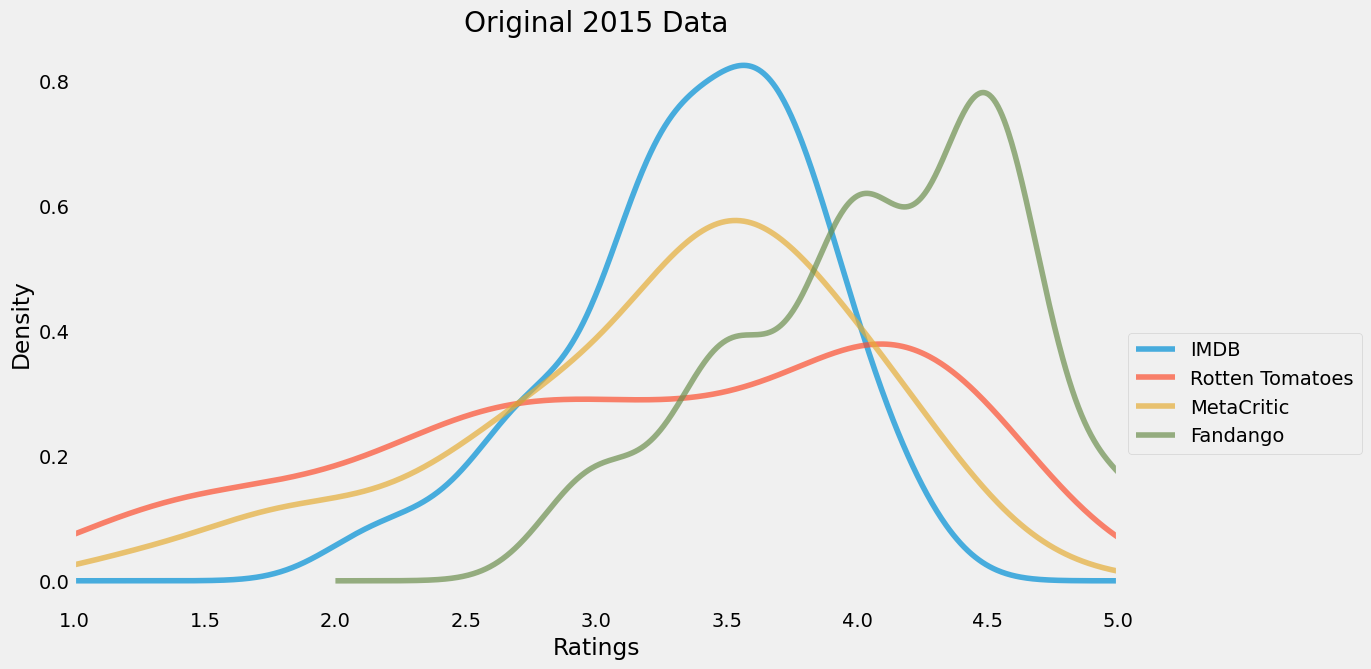

In [19]:
fandango_2015['IMDB_norm'].plot.kde(alpha=0.70, label='IMDB')
fandango_2015['RT_user_norm'].plot.kde(alpha=0.70, figsize=(12,7), label='Rotten Tomatoes')
fandango_2015['Metacritic_user_nom'].plot.kde(alpha=0.70, label='MetaCritic')
only_2015['Fandango_Stars'].plot.kde(label='Fandango',alpha=0.70)


plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.xlim(1,5)
plt.title('Original 2015 Data')
plt.xlabel('Ratings')
plt.grid(False)
plt.show()

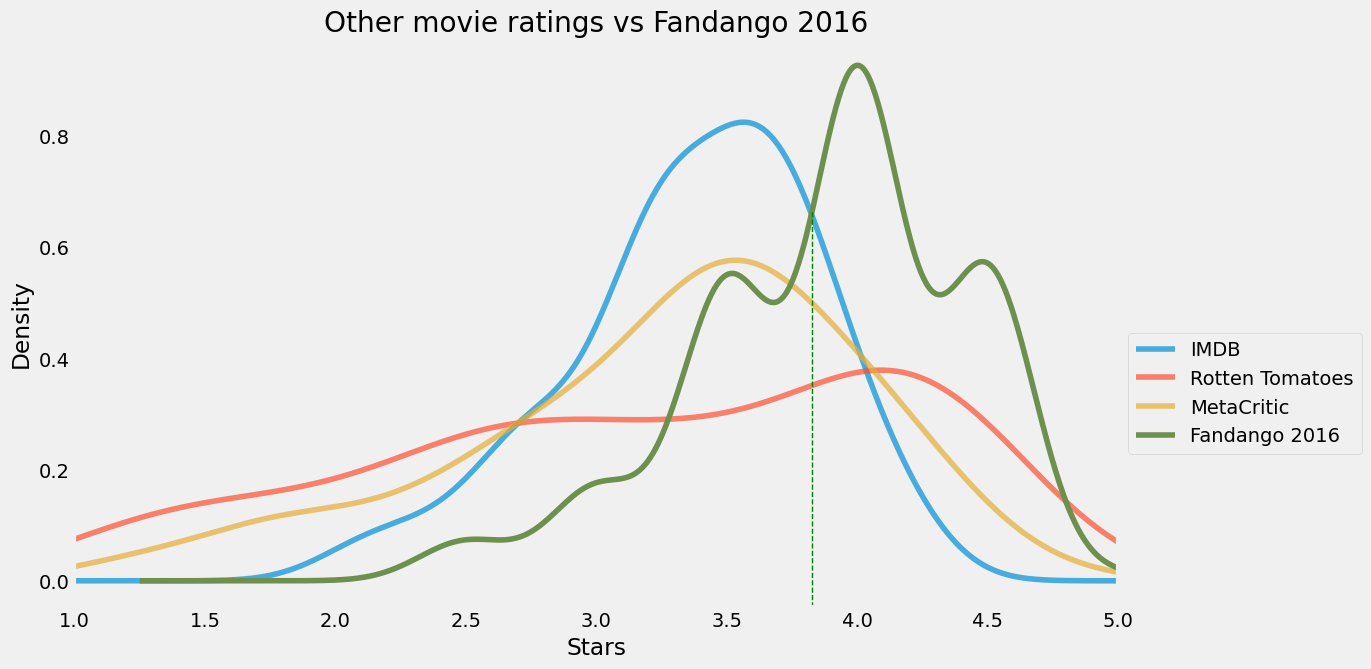

In [27]:
fandango_2015['IMDB_norm'].plot.kde(alpha=0.70,label='IMDB')
fandango_2015['RT_user_norm'].plot.kde(alpha=0.70, figsize=(12,7), label='Rotten Tomatoes')
fandango_2015['Metacritic_user_nom'].plot.kde(alpha=0.70, label='MetaCritic')
only_2016['fandango'].plot.kde(label='Fandango 2016')

plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.xlim(1,5)
plt.xlabel('Stars')
plt.axvline(x=3.825, linewidth=1, ymax=0.7, linestyle='dashed', color='green')
plt.grid(False)
plt.title('Other movie ratings vs Fandango 2016')
plt.show()

As can be seen in the distribution of ratings Fandango still has movie ratings way above other websites. Fandango has the most amount of movies rated over 3.8 Stars. It has most movies rated at 4 stars. 

The largest amount for IMDB and Metacritic is around 3.5 stars. 
Rotten Tomatoes peaks around 4 stars but seems to be more balanced in distribution compared to the rest. 

Lets see what the averages look like for each for a better visual. 

In [49]:
imdb_mean = round(fandango_2015['IMDB_norm'].mean(),1)
mc_mean = round(fandango_2015['Metacritic_user_nom'].mean(),1)
rt_mean = round(fandango_2015['RT_user_norm'].mean(),1)

avg_ratings = pd.DataFrame(({'IMDB':[imdb_mean], 'MetaCritic':[mc_mean], 'Rotten Tomatoes':[rt_mean], 'Fandango':[mean_2016]}), index = ['Average Rating'])
avg_ratings = avg_ratings.T
print(avg_ratings)

                 Average Rating
IMDB                        3.4
MetaCritic                  3.3
Rotten Tomatoes             3.2
Fandango                    3.9


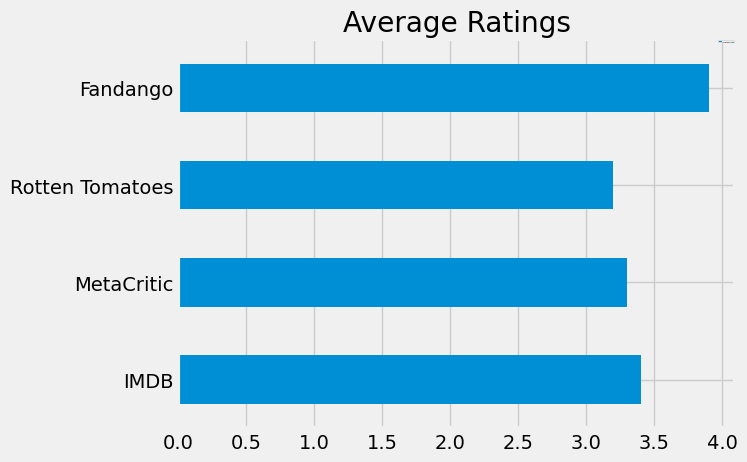

In [58]:
avg_ratings.plot.barh(legend='none')
plt.title('Average Ratings')
plt.legend(fontsize=0)
plt.show()

As we can see on the graph above Fandango's average is 3.9 stars. The second closest is IMDB at 3.4 Stars. 

### Conclusion: 

In my opinion Fandango's rating system is still inaccurate. Even though they made improvements to their rating system they still see higher movie ratings compared to the other 3 movie sites. 

The difference in the ratings is clearly apparent in the 2nd to last density graph comparing the other movie sites. 
We can see how heavily Fandango ratings are distributed above 3.8 Stars. While all other rating websites tend to fall after 3.5 stars Fandango drastically increases. 

The scrutiny received over their rating system might be the reason why we no longer see it in use. They have replaced their system and now use Rotten Tomatoes for their movie rankings. As you can see in the image below underlined in red. 

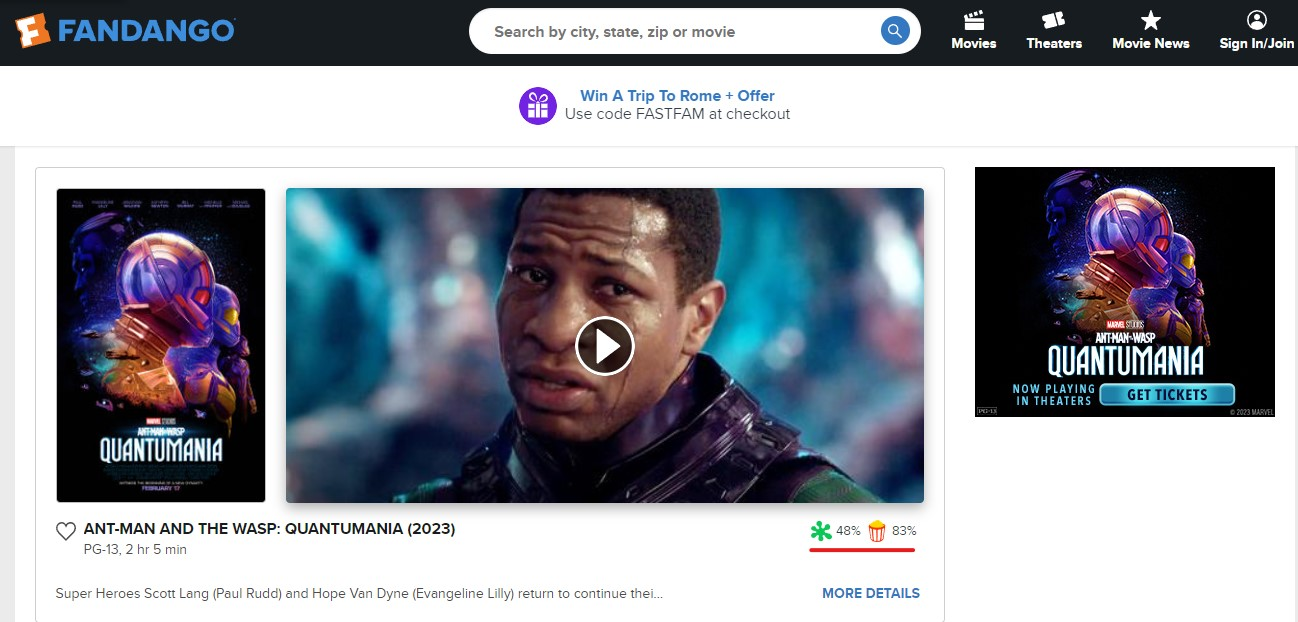